Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


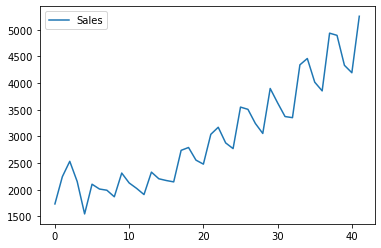

In [6]:
data.plot()
plt.show()

**increasing trend**

In [7]:
quarter = ['Q1','Q2','Q3','Q4']
n = data['Quarter'][0]
n[0:2]
data['quarter']=0

In [8]:
data.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,0
1,Q2_86,2244.960999,0
2,Q3_86,2533.804993,0
3,Q4_86,2154.962997,0
4,Q1_87,1547.818996,0


In [9]:
n

'Q1_86'

In [10]:
n[0:2]

'Q1'

In [11]:
for i in range(42):
  n = data['Quarter'][i]
  print(n[0:2])
  data['quarter'][i]=n[0:2]
  print(i)

Q1
0
Q2
1
Q3
2
Q4
3
Q1
4
Q2
5
Q3
6
Q4
7
Q1
8
Q2
9
Q3
10
Q4
11
Q1
12
Q2
13
Q3
14
Q4
15
Q1
16
Q2
17
Q3
18
Q4
19
Q1
20
Q2
21
Q3
22
Q4
23
Q1
24
Q2
25
Q3
26
Q4
27
Q1
28
Q2
29
Q3
30
Q4
31
Q1
32
Q2
33
Q3
34
Q4
35
Q1
36
Q2
37
Q3
38
Q4
39
Q1
40
Q2
41


C:\Users\virka\AppData\Local\Temp/ipykernel_18116/4065716625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]=n[0:2]
C:\Users\virka\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
dummy = pd.DataFrame(pd.get_dummies(data['quarter']))
dummy.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [13]:
data.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [14]:
data=pd.concat((data,dummy),axis=1)
t = np.arange(1,43)
data['t'] = t
data['t_square'] = t**2

In [15]:
data.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25


In [16]:
train = data.head(32)
test = data.tail(10)

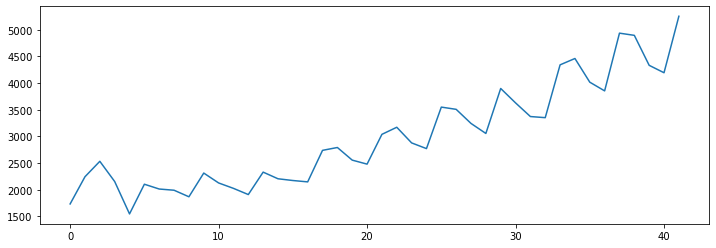

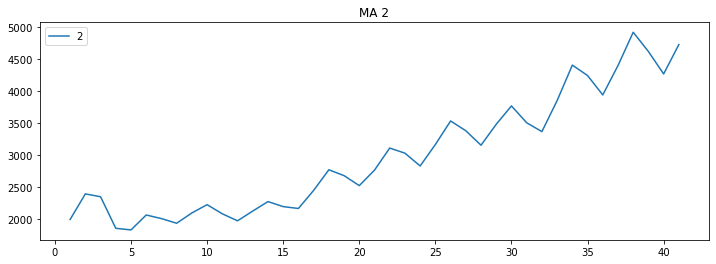

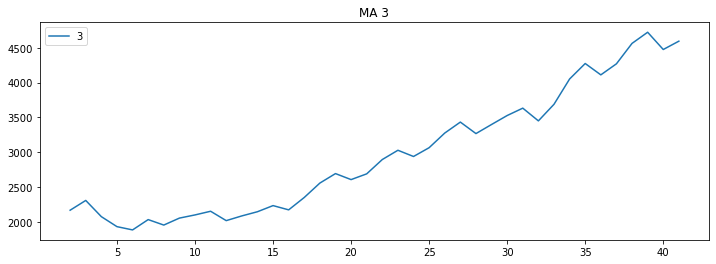

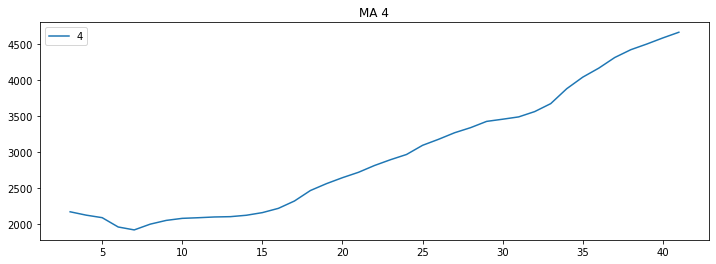

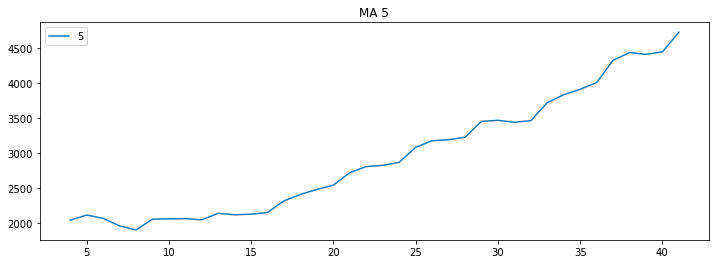

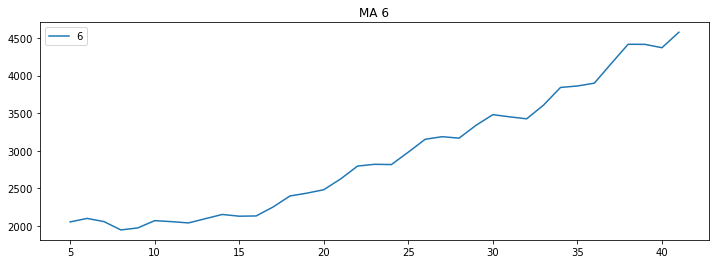

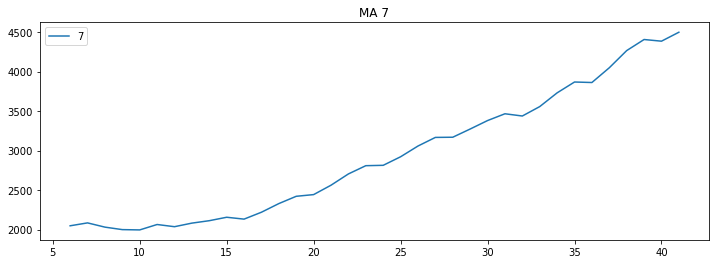

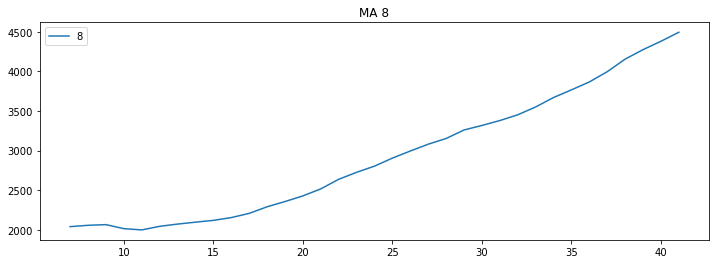

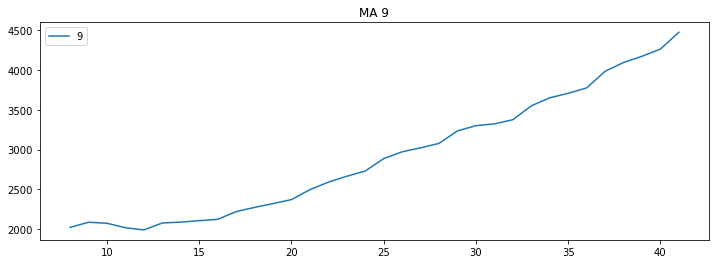

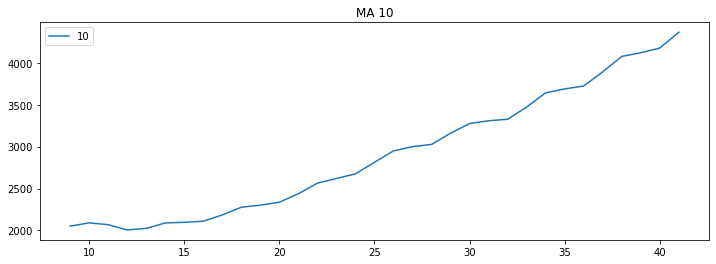

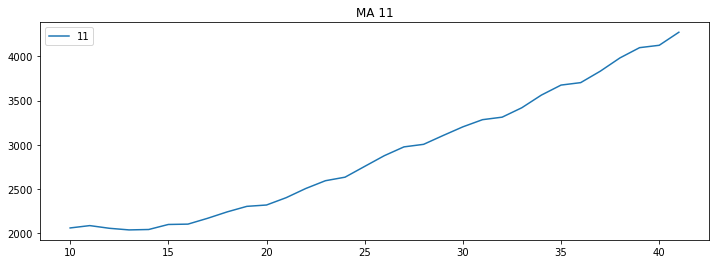

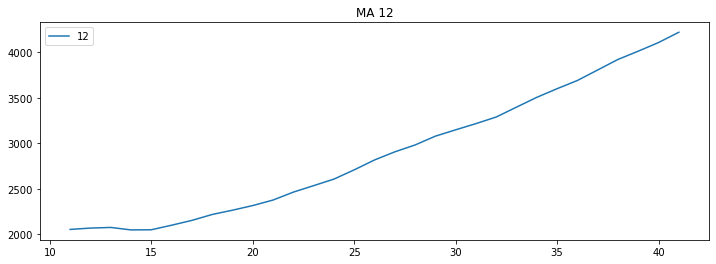

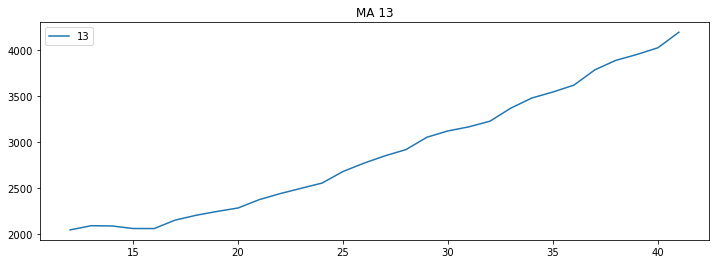

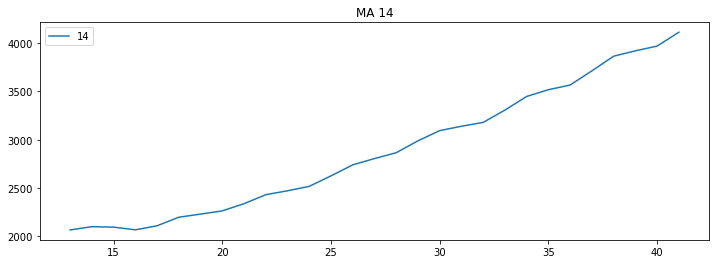

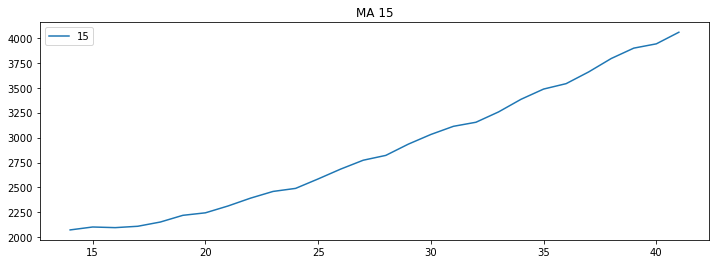

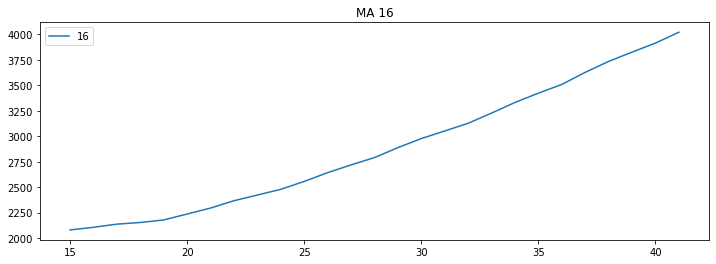

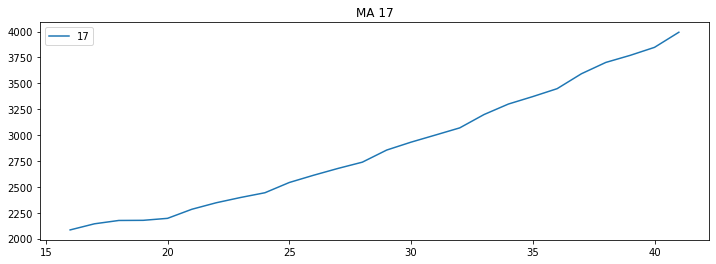

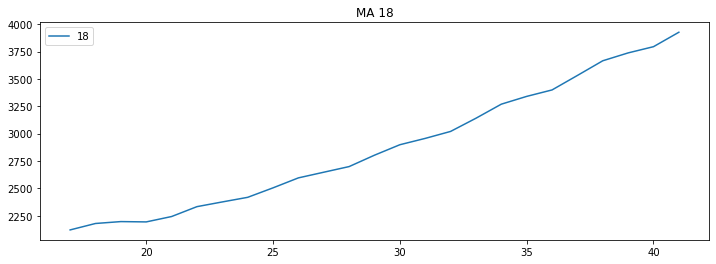

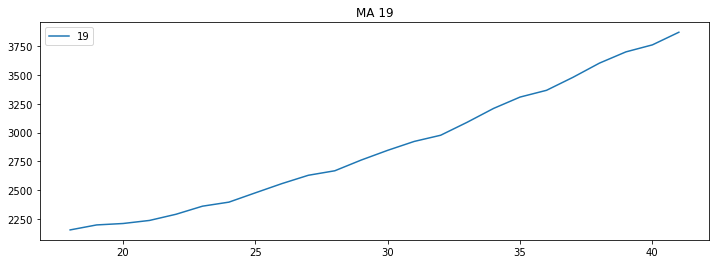

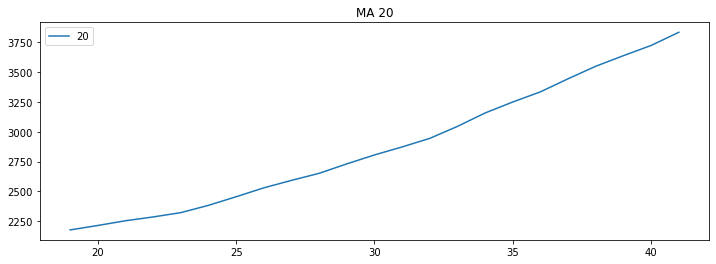

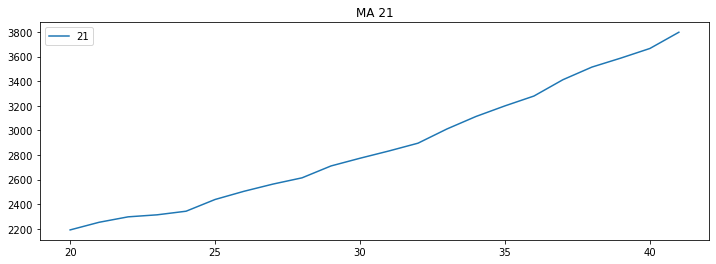

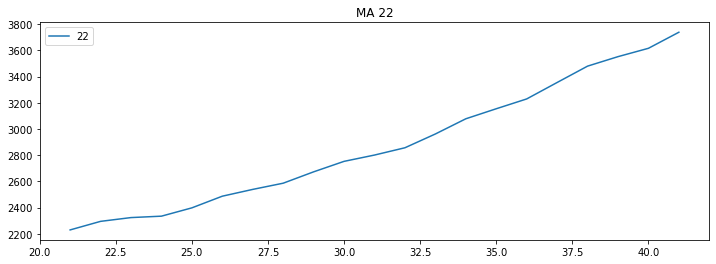

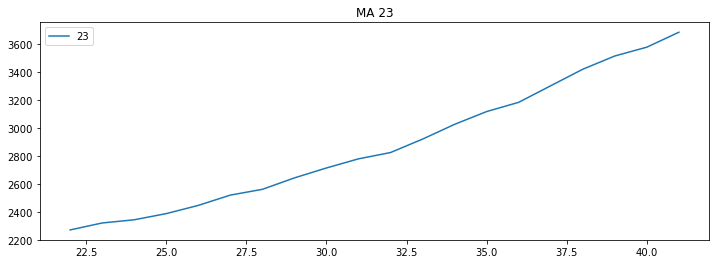

In [17]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,24):
    plt.figure(figsize=(12,4))


    data["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

We can see after MA(moving average)4 the spikes stated increasing so the  period of seasonality is 4

C:\Users\virka\AppData\Local\Temp/ipykernel_18116/3057063916.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(data.Sales,freq=4)


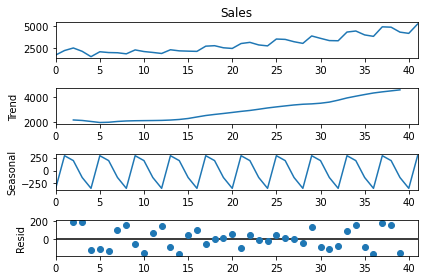

In [18]:
decompose_ts_add = seasonal_decompose(data.Sales,freq=4)
decompose_ts_add.plot()
plt.show()

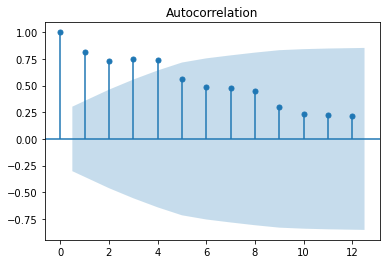

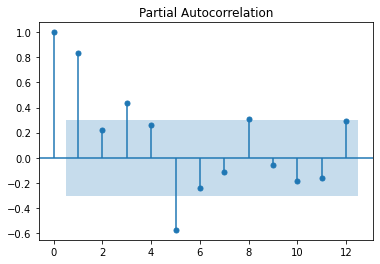

In [19]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [21]:
def RMSE(pred,org):
    rmse = sqrt(mean_squared_error(org, pred))
    return rmse

# **Single exponential**

In [22]:
ses_model = SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_ses,test.Sales) 

C:\Users\virka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


1172.1756457644592

# **Holt Method**

In [23]:
# Holt method 
hw_model = Holt(train['Sales']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hw,test.Sales) 

C:\Users\virka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\virka\AppData\Local\Temp/ipykernel_18116/3572685135.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(train['Sales']).fit(smoothing_level=0.8, smoothing_slope=0.2)


888.7798745682942

# **Holts winter exponential smoothing with additive seasonality and additive trend**

In [24]:
hwe_model_add_add = ExponentialSmoothing(train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_add_add,test.Sales) 

C:\Users\virka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


542.8599219675534

# **Holts winter exponential smoothing with multiplicative seasonality and additive trend**

In [25]:
hwe_model_mul_add = ExponentialSmoothing(train['Sales'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_mul_add,test.Sales)

C:\Users\virka\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


386.9817361171443

In [26]:
split_point = len(data) - 10
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 32, Validation 10


In [27]:
dataset

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


In [29]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\virka\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


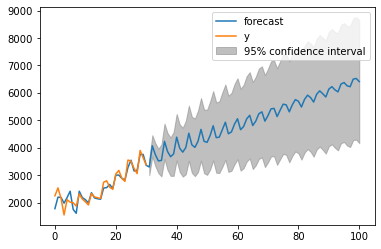

In [30]:
x = dataset.Sales.values
x = x.astype('float32')
model = ARIMA(x,order=(5,1,0))
model_fit=model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,101)
plt.show()

In [31]:
y = validation.Sales.values
y = y.astype('float32')
rmse = sqrt(mean_squared_error(y,forecast[0:10]))
rmse

623.0156849119206

In [32]:
y

array([3352., 4342., 4461., 4017., 3854., 4936., 4895., 4333., 4194.,
       5253.], dtype=float32)

## **We can use Holts winter exponential smoothing with additive seasonality and additive trend for forecasting due to least RMSE**